<a href="https://colab.research.google.com/github/yigiterenpeker/deneme/blob/main/notebooks/forecasting_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

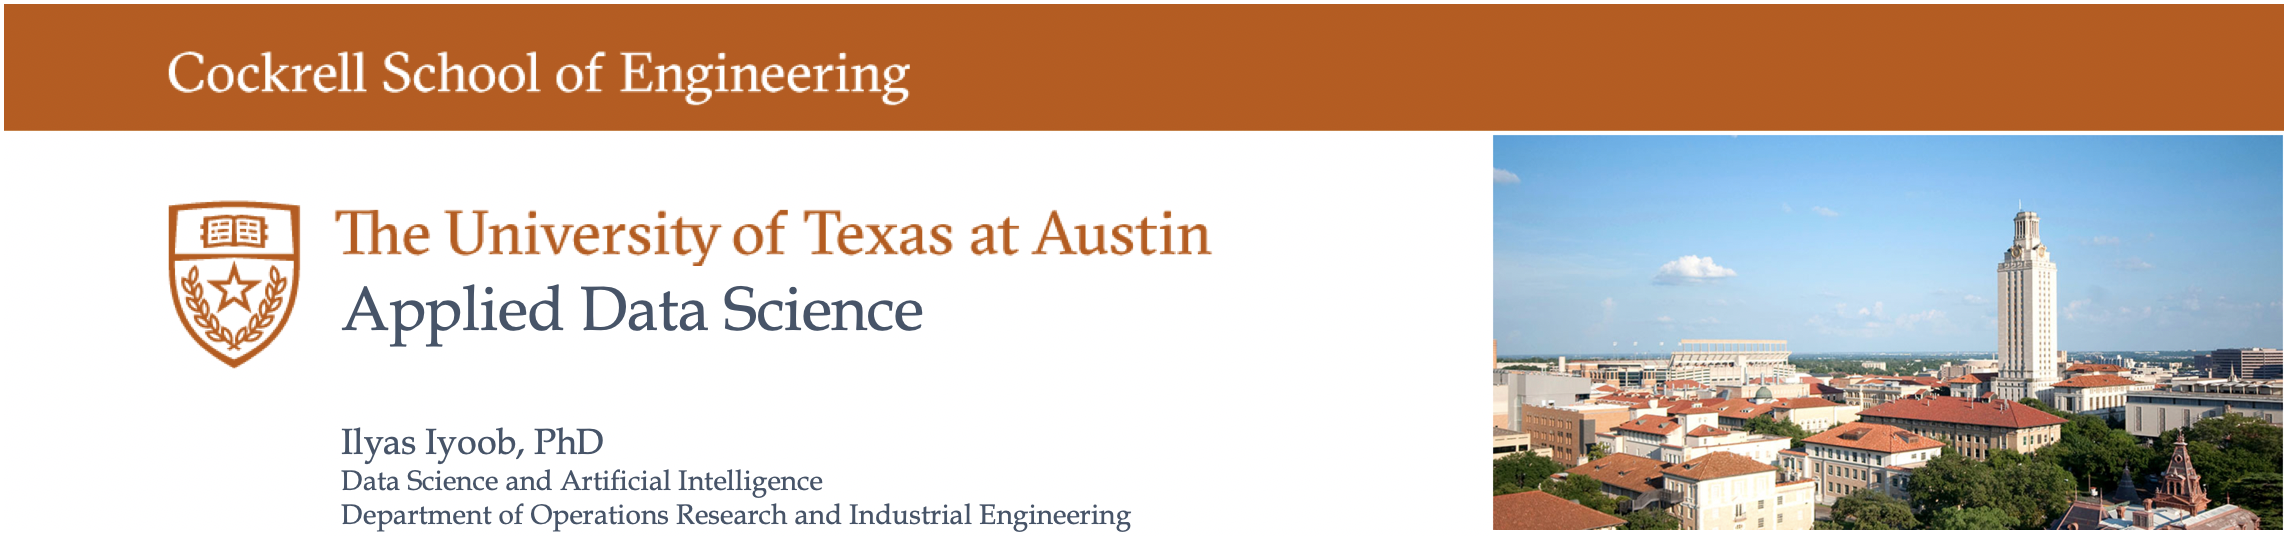

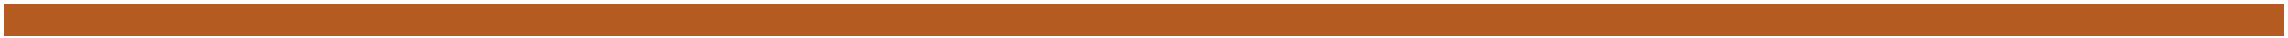

## Initialize

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
dfbank = pd.read_csv('/content/drive/MyDrive/bank-full.csv')

In [22]:
dfbank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

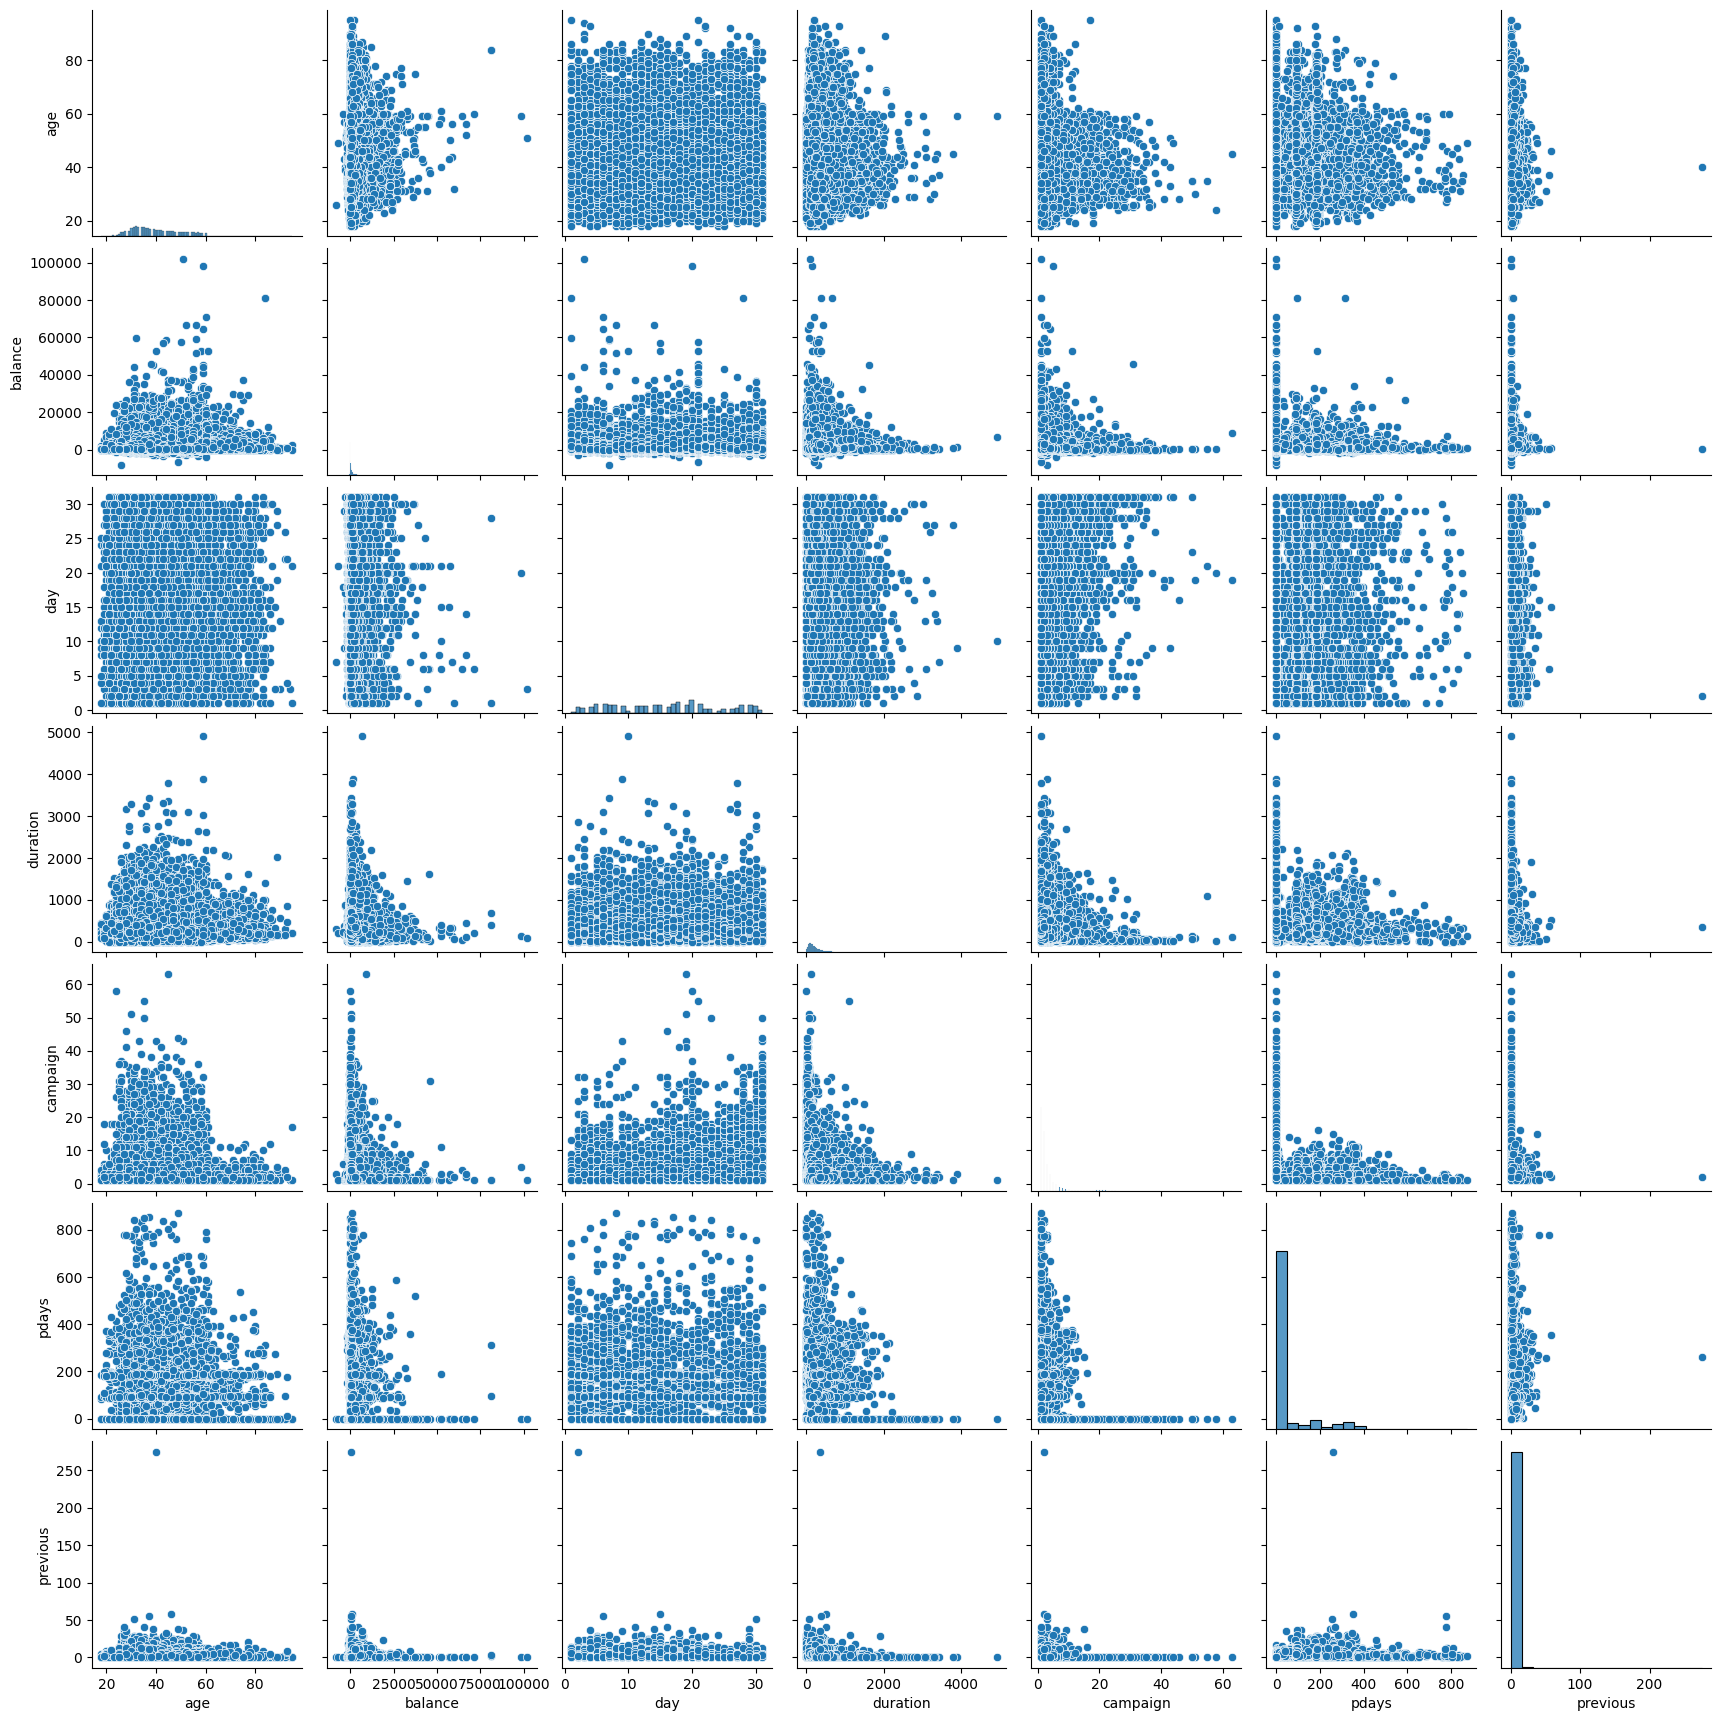

In [23]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfbank)

<Axes: xlabel='age', ylabel='balance'>

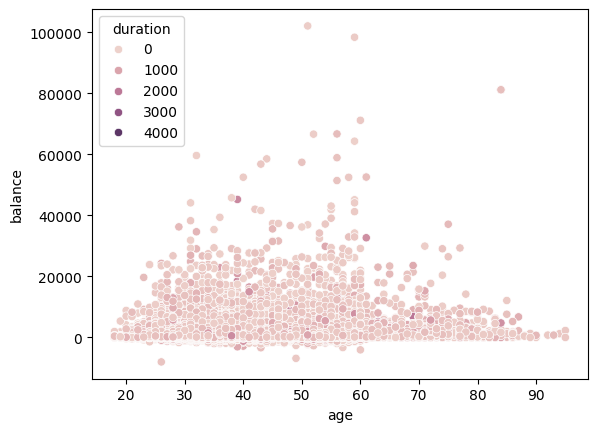

In [39]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfbank['age'], y=dfbank['balance'], hue=dfbank['duration'])

In [42]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale

y = dfbank['y']
X = dfbank.drop(['y'], axis=1)
X =scale(X.select_dtypes(include=['number']))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [43]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrHrt = LogisticRegression(random_state=1)
mdlLgrHrt.fit(X_train, y_train)
y_test_pred = mdlLgrHrt.predict(X_test)

In [44]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7861  132]
 [ 871  179]]


In [45]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7993
         yes       0.58      0.17      0.26      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [46]:
# Display summary results
from sklearn.metrics import classification_report

print ('AUC Score (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

AUC Score (Logistic Regression):
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7993
         yes       0.58      0.17      0.26      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [47]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgHrt = GaussianNB()
mdlNbgHrt.fit(X_train,y_train)
y_test_pred = mdlNbgHrt.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (classification_report(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.94      0.93      7993
         yes       0.44      0.34      0.38      1050

    accuracy                           0.87      9043
   macro avg       0.68      0.64      0.66      9043
weighted avg       0.86      0.87      0.87      9043

AUC Score:
              precision    recall  f1-score   support

          no       0.92      0.94      0.93      7993
         yes       0.44      0.34      0.38      1050

    accuracy                           0.87      9043
   macro avg       0.68      0.64      0.66      9043
weighted avg       0.86      0.87      0.87      9043



In [48]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnHrt = KNeighborsClassifier(n_neighbors=10)
mdlKnnHrt.fit(X_train, y_train)
y_test_pred = mdlKnnHrt.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (classification_report(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7993
         yes       0.55      0.21      0.30      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.86      0.89      0.87      9043



In [49]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmHrt = SVC()
mdlSvmHrt.fit(X_train, y_train)
y_test_pred = mdlSvmHrt.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (classification_report(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7993
         yes       0.59      0.17      0.26      1050

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043

AUC Score:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7993
         yes       0.59      0.17      0.26      1050

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



utexas_ds_orie_divider_gray.png